In [15]:
# import the libraries as shown below
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [16]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
mobilnet = InceptionV3(input_shape=IMAGE_SIZE + [3],weights='imagenet', include_top=False)

#mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 35s 0us/step


In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [6]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [17]:
from tensorflow.keras.layers import MaxPooling2D

In [18]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [20]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [22]:
training_set

In [23]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [24]:

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 21s 2s/step - loss: 1.2673 - accuracy: 0.5168 - val_loss: 0.6489 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 13s 987ms/step - loss: 0.6793 - accuracy: 0.5938 - val_loss: 0.7149 - val_accuracy: 0.3582
Epoch 3/50
13/13 [==============================] - 15s 1s/step - loss: 0.6579 - accuracy: 0.5913 - val_loss: 0.8377 - val_accuracy: 0.3507
Epoch 4/50
13/13 [==============================] - 19s 1s/step - loss: 0.5996 - accuracy: 0.6683 - val_loss: 0.7888 - val_accuracy: 0.3582
Epoch 5/50
13/13 [==============================] - 14s 1s/step - loss: 0.5621 - accuracy: 0.6683 - val_loss: 0.9890 - val_accuracy: 0.3731
Epoch 6/50
13/13 [==============================] - 14s 1s/step - loss: 0.5027 - accuracy: 0.7332 - val_loss: 0.8484 - val_accuracy: 0.3507
Epoch 7/50
13/13 [==============================] - 13s 1s/step - loss: 0.4568 - accuracy: 0.7716 - val_loss: 1.3521 - val_accuracy: 0.3731
Epoch 8/50
13/13 

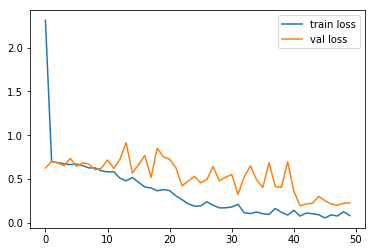

KeyError: 'accuracy'

<Figure size 432x288 with 0 Axes>

In [12]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
from tensorflow.keras.models import load_model

model.save('cnn_model.h5')

In [24]:

y_pred = model.predict(test_set)


In [25]:
y_pred

array([[3.29416543e-01, 6.70583427e-01],
       [9.95525658e-01, 4.47429763e-03],
       [6.73307717e-01, 3.26692283e-01],
       [2.50407457e-01, 7.49592543e-01],
       [8.05086315e-01, 1.94913730e-01],
       [9.83192682e-01, 1.68073103e-02],
       [3.27049881e-01, 6.72950089e-01],
       [9.40743625e-01, 5.92564195e-02],
       [6.55883491e-01, 3.44116569e-01],
       [7.58942544e-01, 2.41057441e-01],
       [1.15816243e-01, 8.84183705e-01],
       [2.08479792e-01, 7.91520238e-01],
       [9.77544665e-01, 2.24552937e-02],
       [8.02779272e-02, 9.19722140e-01],
       [2.22165838e-01, 7.77834117e-01],
       [1.77248389e-01, 8.22751641e-01],
       [4.15821135e-01, 5.84178925e-01],
       [9.99977350e-01, 2.26920802e-05],
       [1.74954310e-01, 8.25045764e-01],
       [1.93584010e-01, 8.06416035e-01],
       [8.48712683e-01, 1.51287377e-01],
       [9.74758148e-01, 2.52418090e-02],
       [9.99992490e-01, 7.49614537e-06],
       [3.54146659e-01, 6.45853341e-01],
       [4.213011

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1], dtype=int64)

In [28]:
from keras.models import load_model
from keras.preprocessing import image

In [30]:
model_reloaded=load_model('cnn_model.h5')

In [31]:
img=image.load_img('Dataset/Test/infected/2.png',target_size=(224,224))

In [32]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [33]:
x.shape

(224, 224, 3)

In [34]:
x=x/255

In [35]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [36]:
model_reloaded.predict(img_data)

array([[1., 0.]], dtype=float32)

In [37]:
a=np.argmax(model_reloaded.predict(img_data), axis=1)

In [38]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
